In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import optimizers

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model

from tensorflow.keras.optimizers import Adam, SGD, RMSprop

from tensorflow.keras import layers
from tensorflow.keras import regularizers

import matplotlib.pyplot as plt

from tensorflow.keras.utils import image_dataset_from_directory

import numpy as np

In [2]:
IMG_W = 150
IMG_H = 150
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 20
BATCH_SIZE = 16

In [3]:
new_base_dir = "./2-step/split data"

#new_base_dir = pathlib.Path("./2-step/split data")

In [4]:
train_dataset = image_dataset_from_directory(
new_base_dir + "/train",
image_size=(IMG_W, IMG_W),
batch_size=BATCH_SIZE
)

validation_dataset = image_dataset_from_directory(
new_base_dir + "/val",
image_size=(IMG_W, IMG_W),
batch_size=BATCH_SIZE,
)

test_dataset = image_dataset_from_directory(
new_base_dir + "/test",
image_size=(IMG_W, IMG_W),
batch_size=BATCH_SIZE
)

Found 2100 files belonging to 2 classes.
Found 450 files belonging to 2 classes.
Found 450 files belonging to 2 classes.


In [5]:
# with 8 units

In [9]:
inputs = keras.Input(shape=INPUT_SHAPE)
#-----------------------------------------------------------------
x = inputs
x = layers.Rescaling(1./255)(inputs)
#---------------------------------------------------------------------------------------
x = layers.Conv2D(filters=8, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dense(8, activation="sigmoid")(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
               optimizer="rmsprop",
               metrics=["accuracy",tf.keras.metrics.TruePositives(), tf.keras.metrics.TrueNegatives()])


history = model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = EPOCHS)

Epoch 1/20
132/132 [==============================] - 8s 46ms/step - loss: 0.5506 - accuracy: 0.7162 - true_positives_3: 753.0000 - true_negatives_3: 751.0000 - val_loss: 0.3606 - val_accuracy: 0.8778 - val_true_positives_3: 198.0000 - val_true_negatives_3: 197.0000
Epoch 2/20
132/132 [==============================] - 6s 47ms/step - loss: 0.3298 - accuracy: 0.8833 - true_positives_3: 905.0000 - true_negatives_3: 950.0000 - val_loss: 0.2919 - val_accuracy: 0.8933 - val_true_positives_3: 201.0000 - val_true_negatives_3: 201.0000
Epoch 3/20
132/132 [==============================] - 6s 45ms/step - loss: 0.2644 - accuracy: 0.9143 - true_positives_3: 952.0000 - true_negatives_3: 968.0000 - val_loss: 0.2513 - val_accuracy: 0.9156 - val_true_positives_3: 199.0000 - val_true_negatives_3: 213.0000
Epoch 4/20
132/132 [==============================] - 6s 43ms/step - loss: 0.2264 - accuracy: 0.9243 - true_positives_3: 960.0000 - true_negatives_3: 981.0000 - val_loss: 0.6657 - val_accuracy: 0.746

29/29 [==============================] - 1s 23ms/step - loss: 0.1676 - accuracy: 0.9489 - true_positives_3: 214.0000 - true_negatives_3: 213.0000
Test accuracy: 0.949 
Test loss: 0.168 
True positive: 214.000 
Test accuracy: 213.000


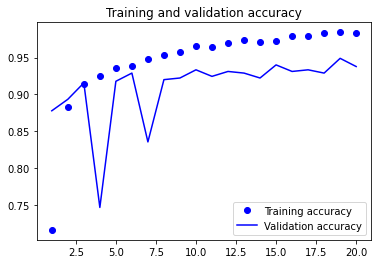

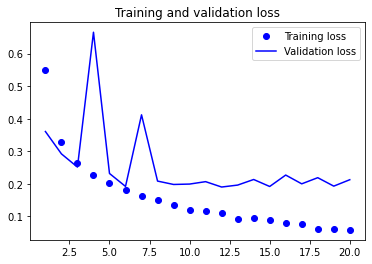

In [13]:
test_loss, test_acc, true_pos, true_neg = model.evaluate(test_dataset)

print(f"Test accuracy: {test_acc:.3f}",
      f"\nTest loss: {test_loss:.3f}",
      f"\nTrue positive: {true_pos:.3f}",
      f"\nTest accuracy: {true_neg:.3f}")

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [14]:
# with 16 units

In [15]:
inputs = keras.Input(shape=INPUT_SHAPE)
#-----------------------------------------------------------------
x = inputs
x = layers.Rescaling(1./255)(inputs)
#---------------------------------------------------------------------------------------
x = layers.Conv2D(filters=8, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="sigmoid")(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
               optimizer="rmsprop",
               metrics=["accuracy",tf.keras.metrics.TruePositives(), tf.keras.metrics.TrueNegatives()])


history = model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = EPOCHS)

Epoch 1/20
132/132 [==============================] - 7s 45ms/step - loss: 0.6376 - accuracy: 0.6248 - true_positives_4: 643.0000 - true_negatives_4: 669.0000 - val_loss: 0.4460 - val_accuracy: 0.8178 - val_true_positives_4: 203.0000 - val_true_negatives_4: 165.0000
Epoch 2/20
132/132 [==============================] - 6s 43ms/step - loss: 0.3677 - accuracy: 0.8648 - true_positives_4: 910.0000 - true_negatives_4: 906.0000 - val_loss: 0.3143 - val_accuracy: 0.8800 - val_true_positives_4: 200.0000 - val_true_negatives_4: 196.0000
Epoch 3/20
132/132 [==============================] - 6s 43ms/step - loss: 0.2879 - accuracy: 0.9014 - true_positives_4: 962.0000 - true_negatives_4: 931.0000 - val_loss: 0.3589 - val_accuracy: 0.8600 - val_true_positives_4: 165.0000 - val_true_negatives_4: 222.0000
Epoch 4/20
132/132 [==============================] - 6s 45ms/step - loss: 0.2365 - accuracy: 0.9152 - true_positives_4: 958.0000 - true_negatives_4: 964.0000 - val_loss: 0.2476 - val_accuracy: 0.915

29/29 [==============================] - 1s 27ms/step - loss: 0.1767 - accuracy: 0.9444 - true_positives_4: 217.0000 - true_negatives_4: 208.0000
Test accuracy: 0.944 
Test loss: 0.177 
True positive: 217.000 
Test accuracy: 208.000


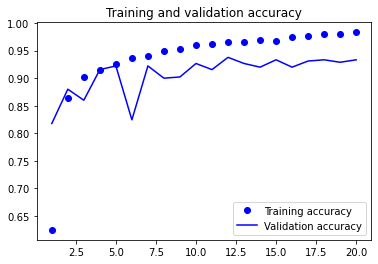

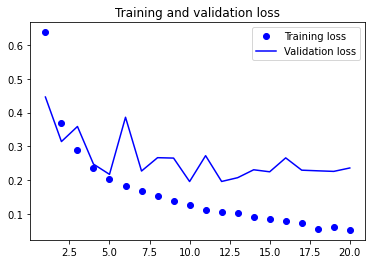

In [16]:
test_loss, test_acc, true_pos, true_neg = model.evaluate(test_dataset)

print(f"Test accuracy: {test_acc:.3f}",
      f"\nTest loss: {test_loss:.3f}",
      f"\nTrue positive: {true_pos:.3f}",
      f"\nTest accuracy: {true_neg:.3f}")

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [17]:
# with 32 units

In [18]:
inputs = keras.Input(shape=INPUT_SHAPE)
#-----------------------------------------------------------------
x = inputs
x = layers.Rescaling(1./255)(inputs)
#---------------------------------------------------------------------------------------
x = layers.Conv2D(filters=8, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dense(32, activation="sigmoid")(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
               optimizer="rmsprop",
               metrics=["accuracy",tf.keras.metrics.TruePositives(), tf.keras.metrics.TrueNegatives()])


history = model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = EPOCHS)

Epoch 1/20
132/132 [==============================] - 8s 51ms/step - loss: 0.4770 - accuracy: 0.7700 - true_positives_5: 733.0000 - true_negatives_5: 884.0000 - val_loss: 0.3317 - val_accuracy: 0.8578 - val_true_positives_5: 205.0000 - val_true_negatives_5: 181.0000
Epoch 2/20
132/132 [==============================] - 7s 48ms/step - loss: 0.2880 - accuracy: 0.8805 - true_positives_5: 912.0000 - true_negatives_5: 937.0000 - val_loss: 0.2611 - val_accuracy: 0.8911 - val_true_positives_5: 191.0000 - val_true_negatives_5: 210.0000
Epoch 3/20
132/132 [==============================] - 6s 47ms/step - loss: 0.2263 - accuracy: 0.9062 - true_positives_5: 949.0000 - true_negatives_5: 954.0000 - val_loss: 0.2405 - val_accuracy: 0.9111 - val_true_positives_5: 209.0000 - val_true_negatives_5: 201.0000
Epoch 4/20
132/132 [==============================] - 6s 45ms/step - loss: 0.1927 - accuracy: 0.9243 - true_positives_5: 968.0000 - true_negatives_5: 973.0000 - val_loss: 0.2256 - val_accuracy: 0.911

29/29 [==============================] - 1s 28ms/step - loss: 0.2319 - accuracy: 0.9422 - true_positives_5: 215.0000 - true_negatives_5: 209.0000
Test accuracy: 0.942 
Test loss: 0.232 
True positive: 215.000 
Test accuracy: 209.000


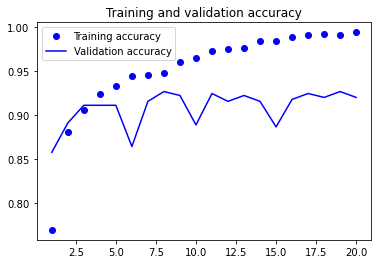

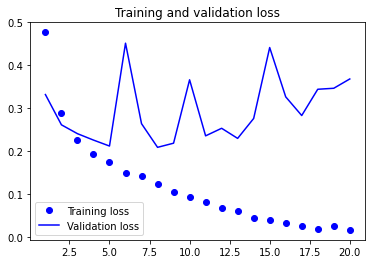

In [19]:
test_loss, test_acc, true_pos, true_neg = model.evaluate(test_dataset)

print(f"Test accuracy: {test_acc:.3f}",
      f"\nTest loss: {test_loss:.3f}",
      f"\nTrue positive: {true_pos:.3f}",
      f"\nTest accuracy: {true_neg:.3f}")

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [20]:
# with 64 units

In [21]:
inputs = keras.Input(shape=INPUT_SHAPE)
#-----------------------------------------------------------------
x = inputs
x = layers.Rescaling(1./255)(inputs)
#---------------------------------------------------------------------------------------
x = layers.Conv2D(filters=8, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation="sigmoid")(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
               optimizer="rmsprop",
               metrics=["accuracy",tf.keras.metrics.TruePositives(), tf.keras.metrics.TrueNegatives()])


history = model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = EPOCHS)

Epoch 1/20
132/132 [==============================] - 8s 47ms/step - loss: 0.5005 - accuracy: 0.7557 - true_positives_6: 809.0000 - true_negatives_6: 778.0000 - val_loss: 0.5083 - val_accuracy: 0.7711 - val_true_positives_6: 216.0000 - val_true_negatives_6: 131.0000
Epoch 2/20
132/132 [==============================] - 6s 46ms/step - loss: 0.3045 - accuracy: 0.8748 - true_positives_6: 906.0000 - true_negatives_6: 931.0000 - val_loss: 0.2727 - val_accuracy: 0.8933 - val_true_positives_6: 197.0000 - val_true_negatives_6: 205.0000
Epoch 3/20
132/132 [==============================] - 7s 48ms/step - loss: 0.2249 - accuracy: 0.9076 - true_positives_6: 949.0000 - true_negatives_6: 957.0000 - val_loss: 0.2351 - val_accuracy: 0.9089 - val_true_positives_6: 200.0000 - val_true_negatives_6: 209.0000
Epoch 4/20
132/132 [==============================] - 6s 45ms/step - loss: 0.1854 - accuracy: 0.9324 - true_positives_6: 970.0000 - true_negatives_6: 988.0000 - val_loss: 0.2131 - val_accuracy: 0.924

29/29 [==============================] - 1s 26ms/step - loss: 0.2011 - accuracy: 0.9622 - true_positives_6: 218.0000 - true_negatives_6: 215.0000
Test accuracy: 0.962 
Test loss: 0.201 
True positive: 218.000 
Test accuracy: 215.000


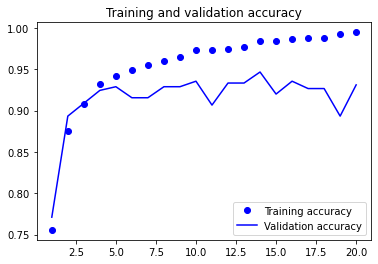

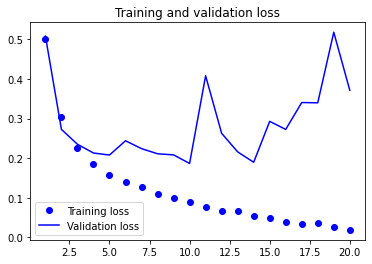

In [22]:
test_loss, test_acc, true_pos, true_neg = model.evaluate(test_dataset)

print(f"Test accuracy: {test_acc:.3f}",
      f"\nTest loss: {test_loss:.3f}",
      f"\nTrue positive: {true_pos:.3f}",
      f"\nTest accuracy: {true_neg:.3f}")

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()